In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy.stats import zscore

In [28]:
df=pd.read_csv(r"C:\Users\preet\Desktop\car_price_prediction.csv")

In [29]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [7]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [13]:
df["Levy"]=pd.to_numeric(df["Levy"],errors="coerce")

In [14]:
df.dtypes

ID                    int64
Price                 int64
Levy                float64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [15]:
df.isnull().sum()

ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

In [18]:
df.Doors.duplicated().sum()

np.int64(19234)

In [22]:
df.drop(0)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
1,44731507,16621,1018.000000,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,906.838128,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891.000000,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,906.838128,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831.000000,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836.000000,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288.000000,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [26]:
df.drop('Manufacturer',axis=1,inplace=True)
df.head()

,ID,Price,Levy,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.000000,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.000000,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,906.838128,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.000000,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.000000,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [28]:
df.describe()

,ID,Price,Levy,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,906.838128,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,385.733455,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,87.000000,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,730.000000,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,906.838128,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,917.000000,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,11714.000000,2020.000000,16.000000,16.000000


In [83]:
df["Levy"].dtype


dtype('O')

In [30]:
df["Levy"]=pd.to_numeric(df["Levy"],errors="coerce")

In [31]:
df.dtypes

ID                    int64
Price                 int64
Levy                float64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

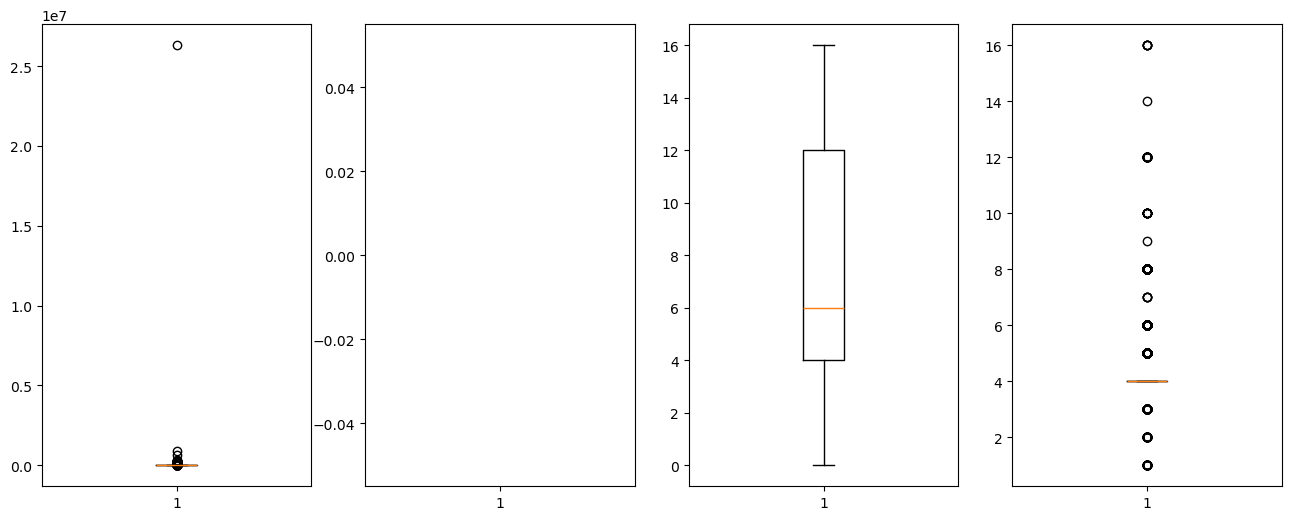

In [32]:
fig , axs = plt.subplots(1,4,figsize = (16,6))
axs[0].boxplot(df.Price	)
axs[1].boxplot(df.Levy)
axs[2].boxplot(df.Airbags)
axs[3].boxplot(df.Cylinders)

plt.show()

In [33]:
numeric_df = df.select_dtypes(include='number')

In [34]:
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1


In [35]:
IQR

ID            103662.0
Price          16744.0
Levy             418.0
Prod. year         6.0
Cylinders          0.0
Airbags            8.0
dtype: float64

In [36]:
upper_limit = Q3 +1.5*IQR
lower_limit = Q1 -1.5*IQR

In [37]:
outliers = ((numeric_df < lower_limit) | (numeric_df > upper_limit)).any(axis=1)
cleaned_df = df[~outliers]
outlier_df = df[~outliers]


In [38]:
outlier_df.head()
cleaned_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761.0,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12


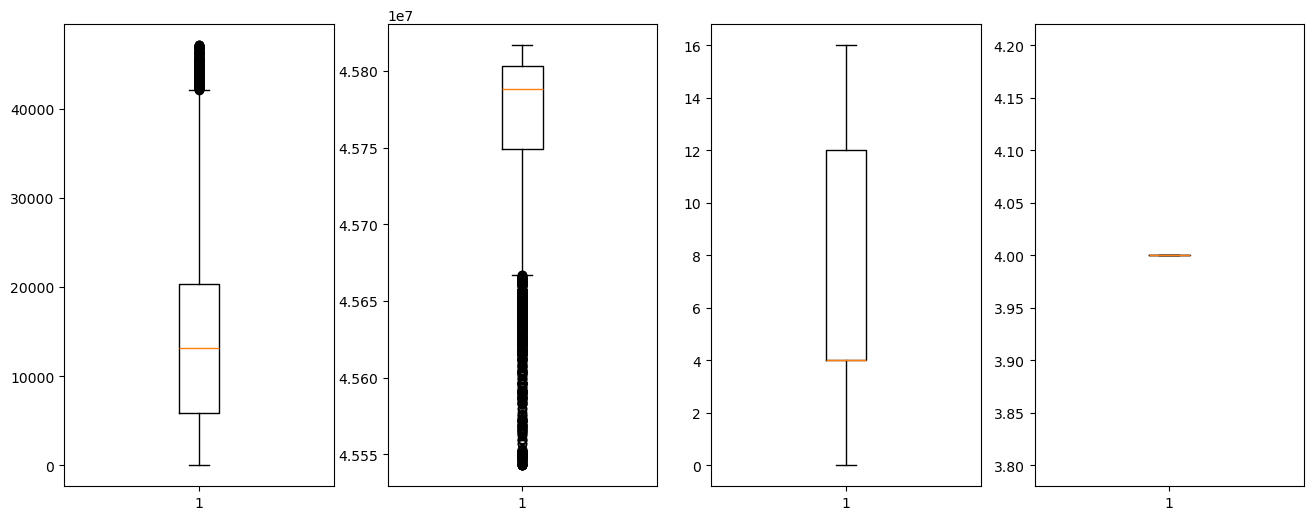

In [39]:

fig , axs = plt.subplots(1,4,figsize = (16,6))
axs[0].boxplot(cleaned_df.Price)
axs[1].boxplot(cleaned_df.ID)
axs[2].boxplot(cleaned_df.Airbags)
axs[3].boxplot(cleaned_df.Cylinders)

plt.show()

In [40]:
z_score = np.abs(zscore(numeric_df))
z_score_mask = (z_score > 3).any(axis=1)

In [97]:
df[z_score_mask]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
96,45776745,18817,NaN,NISSAN,Patrol,1990,Jeep,No,Diesel,2.8 Turbo,333333 km,4.0,Manual,Rear,04-May,Left wheel,Black,0
115,45534351,11917,11714.0,MERCEDES-BENZ,E 500 AMG,2003,Sedan,Yes,Petrol,5,150000 km,12.0,Tiptronic,Rear,04-May,Right-hand drive,White,12
144,45759786,4300,NaN,MERCEDES-BENZ,208,1985,Universal,No,Diesel,2.5,1111111 km,4.0,Manual,Rear,04-May,Left wheel,Black,1
194,45776729,19757,NaN,NISSAN,Patrol Y60,1990,Jeep,No,Diesel,2.8 Turbo,222222 km,4.0,Manual,Rear,04-May,Left wheel,Black,0
219,41704944,19130,2148.0,MERCEDES-BENZ,CLS 550,2010,Sedan,Yes,Petrol,5.5,157000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19048,45770541,14113,4860.0,MERCEDES-BENZ,CL 600,2002,Coupe,Yes,Petrol,6,127000 km,12.0,Tiptronic,Rear,02-Mar,Left wheel,Silver,12
19061,25368573,12544,NaN,BMW,325,2002,Sedan,Yes,CNG,2.5,220000 km,6.0,Tiptronic,Rear,04-May,Left wheel,Silver,8
19130,45812919,3136,NaN,MERCEDES-BENZ,E 230 124,1990,Sedan,No,CNG,2.3,350000 km,4.0,Automatic,Rear,04-May,Left wheel,Grey,0
19151,42287915,21953,NaN,FORD,Transit,1999,Microbus,No,Diesel,2.5 Turbo,430000 km,4.0,Manual,Rear,04-May,Left wheel,White,1


In [98]:
df.isnull().sum()

ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

In [41]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [101]:
df[z_score_mask]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
96,45776745,18817,906.838128,NISSAN,Patrol,1990,Jeep,No,Diesel,2.8 Turbo,333333 km,4.0,Manual,Rear,04-May,Left wheel,Black,0
115,45534351,11917,11714.000000,MERCEDES-BENZ,E 500 AMG,2003,Sedan,Yes,Petrol,5,150000 km,12.0,Tiptronic,Rear,04-May,Right-hand drive,White,12
144,45759786,4300,906.838128,MERCEDES-BENZ,208,1985,Universal,No,Diesel,2.5,1111111 km,4.0,Manual,Rear,04-May,Left wheel,Black,1
194,45776729,19757,906.838128,NISSAN,Patrol Y60,1990,Jeep,No,Diesel,2.8 Turbo,222222 km,4.0,Manual,Rear,04-May,Left wheel,Black,0
219,41704944,19130,2148.000000,MERCEDES-BENZ,CLS 550,2010,Sedan,Yes,Petrol,5.5,157000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19048,45770541,14113,4860.000000,MERCEDES-BENZ,CL 600,2002,Coupe,Yes,Petrol,6,127000 km,12.0,Tiptronic,Rear,02-Mar,Left wheel,Silver,12
19061,25368573,12544,906.838128,BMW,325,2002,Sedan,Yes,CNG,2.5,220000 km,6.0,Tiptronic,Rear,04-May,Left wheel,Silver,8
19130,45812919,3136,906.838128,MERCEDES-BENZ,E 230 124,1990,Sedan,No,CNG,2.3,350000 km,4.0,Automatic,Rear,04-May,Left wheel,Grey,0
19151,42287915,21953,906.838128,FORD,Transit,1999,Microbus,No,Diesel,2.5 Turbo,430000 km,4.0,Manual,Rear,04-May,Left wheel,White,1


In [1]:
###task1

In [5]:
import itertools
import random


In [6]:
actions = ["Click", "Scroll", "Exit"]
sample_space = list(itertools.product(actions, repeat=2))


In [7]:
sample_space

[('Click', 'Click'),
 ('Click', 'Scroll'),
 ('Click', 'Exit'),
 ('Scroll', 'Click'),
 ('Scroll', 'Scroll'),
 ('Scroll', 'Exit'),
 ('Exit', 'Click'),
 ('Exit', 'Scroll'),
 ('Exit', 'Exit')]

In [8]:
event = [outcome for outcome in sample_space if "Click" in outcome]


In [23]:
event

[('Click', 'Click'),
 ('Click', 'Scroll'),
 ('Click', 'Exit'),
 ('Scroll', 'Click'),
 ('Exit', 'Click')]

In [18]:
 Theoretical_probability = len(event) / len(sample_space)

In [19]:
 Theoretical_probability

0.5555555555555556

In [20]:
n = 1000
count_sum_7 = 0

for _ in range(n):
    dice1 = random.randint(1, 6)
    dice2 = random.randint(1, 6)
    
    if dice1 + dice2 == 7:
        count_sum_7 += 1

experimental_probability = count_sum_7 / n
ssssssz

In [21]:
experimental_probability

0.177

In [24]:
##task 2

In [2]:
from fractions import Fraction

In [3]:
p_heads = Fraction(1, 2)
p_six = Fraction(1, 6)

independent_result = p_heads * p_six
independent_result

Fraction(1, 12)

In [4]:
p_first_red = Fraction(5, 10)
p_second_red_given_first = Fraction(4, 9)

dependent_result = p_first_red * p_second_red_given_first
dependent_result

Fraction(2, 9)

In [5]:
##task 3

In [6]:
P_spam = 0.1
P_ham = 0.9
P_free_given_spam = 0.9
P_free_given_ham = 0.05

In [7]:
P_free = (P_free_given_spam * P_spam) + (P_free_given_ham * P_ham)
P_free

0.135

In [8]:
P_spam_given_free = (P_free_given_spam * P_spam) / P_free
P_spam_given_free

0.6666666666666667